# Microflows. A very brief introduction with lubrication and capillarity

## 1. Laminar flows and fundamentals of lubrication

For a correct development of this lecture, a review of viscous flows (Couette and Hagen-Poiseullie flows and similar) studied in previous courses of Introductory Fluid Mechanics is advised.

This section is focused on fluid flows at very small scales. This is the basis of the technological field known as [Microfluidics](https://en.wikipedia.org/wiki/Microfluidics).

At very small scales, with confined or semi-confined flows, Reynolds number is commonly very small even with high velocities or low viscosities. For example, for a small journal bearing, say 5mm diameter, spinning at 1500 rpm, with a clearance of 0.1 mm, even with water, Reynolds number is

$$
\text{Re} = \frac{\omega d c}{2\nu} \tag{1}
$$

In [1]:
import numpy as np

In [2]:
d = 5 # mm
c = 0.1 # mm
N = 1500 # rpm
nu = 1e-6 # m^2/s
d = 5/1000 # m
c = c/1000 # m
omega = 1500*np.pi/30 #rad/s
u = omega*d/2 #m/s
Re = u*c/nu
print('Reynolds number = {:.3g}'.format(Re))

Reynolds number = 39.3


For more viscous fluid, or smaller devices, Reynolds number can be much lower than 1.

### Activity

Think on some device with fluid flow at very low Reynolds number. Estimate the value of this Reynolds number. Try to think on something with $\text{Re} < 1$.

### The velocity profile
In previous introductory Fluid Mechanics courses, this kind of flows have been studied with very simple geometries. Examples are flow between two parallel planes with relative velocity (Couette flow) or with pressure gradient (Poisueille flow) or viscous flow inside a pipe with pressure gradient (Hagen-Poiseuille flow). For details, see sections 4.11 and 6.4 in White's book.

Here we are going to generalise this kind of flows, when pressure difference and relative velocity are combined, and planes are not parallels (but quasi-parallels). This kind of flows are very important in lubrication, which has a principal role in all the industrial processes. The technology branch that studies lubrication and wear is known as _[Tribology](https://en.wikipedia.org/wiki/Tribology)_.

Let's consider a 2D flow in the $x-y$ plane, confined by two surfaces (we consider as unity the length in the $z$ direction). The lower surface is plane and it lies on the $y$-normal plane, and the upper is separated by a distance $h(x,t)$.

![surfaces.dio.svg](surfaces.dio.svg)

We are considering that length $L \gg h(x,t)$ and also that walls are planes, or with a curvature radius much larger also than $h(x,t)$

The continuity equation is 

$$
\frac{\partial u_i}{\partial x_i} = 0 \tag{2}
$$

that, in 2D reduces to 

$$
\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y}= 0 \label{eq:cont} \tag{3}
$$

The Navier-Stokes equations are 

$$
\frac{\partial u_i}{\partial t} + u_j\frac{\partial u_i}{\partial x_j} = -\frac{1}{\rho}\frac{\partial p}{\partial x_i} + \nu \frac{\partial^2 u_i}{\partial u_j \partial u_j} \tag{4}
$$

The boundary conditions are $u\left(y=0,t\right)=U_b(t)$ and $u\left(y=h(x,t),t \right)=U_t(t)$ and also $p=p(t)$

As it is usually done in Fluid Mechanics, let's study which scales are important by writing the  dimensionless equations. First, we consider the aspect ratio of the geometry, $\varepsilon = \frac{h}{L}$, a characteristic velocity of the flow (it can be, for example, the velocity of any of the surfaces) $U$ and a characteristic pressure $p_c$ (it is usually the atmospheric pressure). Then the variables of the problem can be normalized as

$$ 
x^* = \frac{x}{L}
$$
$$
y^* = \frac{y}{h} = \frac{y}{\varepsilon L}
$$
$$
t^* = t \frac{L}{U}
$$
$$
u^* = \frac{u}{U}
$$
$$
v^* = \frac{v}{V} = \frac{v}{\varepsilon U}
$$
$$
p^* = \frac{p}{p_c} \tag{5}
$$

Then continuity equation leads to 

$$
\frac{\partial u^*}{\partial x^*} + \frac{\partial v^*}{\partial y^*}= 0 \label{eq:cont*} \tag{6}
$$

that is, no changes. But Navier-Stokes equations yields

$$
\varepsilon^2 \text{Re}_L  \left( \frac{\partial u^*}{\partial t^*} + u^*\frac{\partial u^*}{\partial x^*} + v^*\frac{\partial u^*}{\partial y^*} \right)  = -\frac{1}{\Lambda}\frac{\partial p^*}{\partial x^*} + \varepsilon^2 \frac{\partial^2 u^*}{\partial {x^*}^2} + \frac{\partial^2 u^*}{\partial {y^*}^2} 
\tag{7a}$$ 
$$
\varepsilon^4 \text{Re}_L  \left( \frac{\partial v^*}{\partial t^*} + u^*\frac{\partial v^*}{\partial x^*} + v^*\frac{\partial v^*}{\partial y^*} \right)  = -\frac{1}{\Lambda}\frac{\partial p^*}{\partial y^*} + \varepsilon^4 \frac{\partial^2 v^*}{\partial {x^*}^2} + \varepsilon^2 \frac{\partial^2 v^*}{\partial  {y^*}^2}
\tag{7b}
$$

where $\Lambda = \frac{\mu U L}{p_c h^2}$ is the _bearing number_ (ratio of viscous and pressure forces).

For the previous example, considering a bearing lentgh of the same size than diameter, the value of $\varepsilon^2 \text{Re}_L$ is

In [3]:
epsilon = c/(np.pi*d)
L = 5 # mm
L = L/1000 #  m
ReL = Re*L/c
epsilon2ReL = epsilon**2*ReL
print('epsilon2ReL = {:.2g}'.format(epsilon2ReL))

epsilon2ReL = 0.08


That is, $\varepsilon^2 \text{Re}_L \ll 1$, and, hence, inertial term (including time derivative) can usually be neglected (Remember that this example is with water. Lubricant oils are usually hundreds times more viscous than water)

On  the other hand, bearing number is typically close to unity. We can estimate the characteristic pressure of the journal bearing, and, from here, the characteristic load.

In [4]:
rho = 1000 # Kg/m^3
Lambda = 1
p_c = rho*nu*u*L/(Lambda*c**2)
print('p_c = {:.4g} Pa'.format(p_c))

p_c = 196.3 Pa


In [5]:
W = p_c*L*d
print('W = {:.3g} N'.format(W))

W = 0.00491 N


This is a very low load. Actually it is the typical load that this bearing can bears with a _uniform_ clearance, i.e. without eccentricity. When load increases, the journal moves away from the center and the clearance is not longer uniform, and the value can be very small at specific location in the direction of eccentricity. 

Equation (7a) leads then to 

$$
-\frac{1}{\rho}\frac{\partial p}{\partial x} + \nu \frac{\partial^2 u}{\partial y^2} = 0
$$

and (7b) to

$$
\frac{\partial p}{\partial y} = 0
$$

Note that in (7a) there is no explicit dependence on time. But time is still an independent variable through $p(x,t)$ and boundary conditions, which can be unesteady.

Now we integrate the linear equation

In [7]:
import sympy as sp
sp.init_printing()

In [8]:
x,y,t,mu = sp.symbols('x,y,t,mu')
u = sp.Function('u')
p = sp.Function('p')
h = sp.Function('h')
p_x = sp.Function('p_x') # This function is the gradient of pressure in x direction

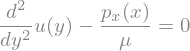

In [9]:
exp = -p_x(x)/mu+sp.diff(u(y),y,2)
sp.Eq(exp,0)

We define the top and bottom velocities and the boundary conditions, by means of a dictionary

In [10]:
Ub,Ut = sp.symbols('U_b,U_t')
ics = {u(0):Ub,u(h(x)):Ut}

And we solve the EDO with the defined boundary conditions

In [11]:
Sol = sp.dsolve(exp,u(y),ics=ics)

And this is the solution:

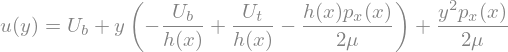

In [12]:
Sol

That can be a little bit simplified

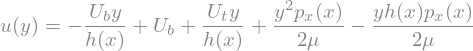

In [13]:
Sol = Sol.simplify()
display(Sol)

Let's consider, for the shake of simplicity, the case with $U_t(t) = U; U_b(t)=0$ 

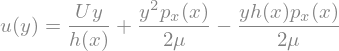

In [14]:
U = sp.symbols('U')
Sol = Sol.replace(Ut,U).replace(Ub,0)
display(Sol)

In order to calculate the pressure distribution, we need another condition for the velocity. This condition is the **mass balance**. The flow rate in any section $x$ must be
independent of $x$

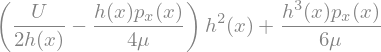

In [15]:
intU = sp.integrate(Sol.rhs,(y,0,h(x)))
display(intU)

### Reynolds equation

The [Reynolds equation](https://en.wikipedia.org/wiki/Reynolds_equation) for lubrications yields when we impose that this flow rate cannot be function of $x$ (that is continuity condition)

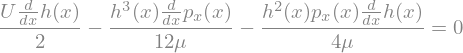

In [16]:
ReynoldsEq = sp.Eq(intU.diff(x),0)
ReynoldsEq = ReynoldsEq.expand()
display(ReynoldsEq)

### Pressure distribution

To calculate the pressure distribution, we consider the solution of 

$$ q = \int_0^h u(y) \text{d} y \tag{8}$$

and we isolate the pressure gradient

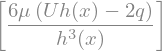

In [17]:
q = sp.symbols('q')
exp_dpdx = sp.solve(intU-q,p_x(x))
display(exp_dpdx)

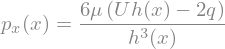

In [18]:
p_eq = sp.Eq(p_x(x), exp_dpdx[0])
display(p_eq)

We now replace $p_x(x)$ with its definition, $p_x(x) = \frac{d p}{d x}$, and we solve it

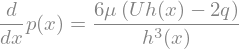

In [19]:
p_eq = p_eq.replace(p_x(x),p(x).diff(x))
display(p_eq)

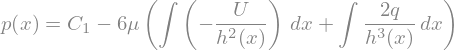

In [20]:
sp.dsolve(p_eq,p(x))

This is the general solution for any shape for $h(x)$. The values for $q$ and the integration constant are obtained from suitable boundary conditions

### Example

Let's apply that for the linear case $h(x)=h_0(1+\alpha x/L)$, with $\alpha \ll 1$. It is the working principle of a [tilting-pad bearing](https://en.wikipedia.org/wiki/Fluid_bearing#Michell.2FKingsbury_tilting-pad_fluid_bearings)

![image.png](tiltingPad1.png)

![image.png](tiltingPad2.png)


First, we replace the generic $h(x)$ by this particular case

In [21]:
h0,alpha,L = sp.symbols('h_0, alpha,L')
p_eq = p_eq.replace(h(x),h0*(1+alpha*x/L))

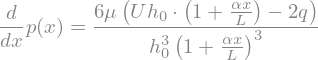

In [22]:
p_eq

Next, we integrate the pressure distribution with the proper boundary condition for $p(x=0)=p_a$

In [23]:
pa = sp.symbols('pa')

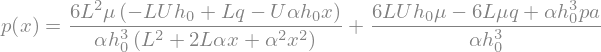

In [24]:
p_sol = sp.dsolve(p_eq,p(x),ics={p(0):pa})
display(p_sol)

The flow rate in this moving pad can be calculated with the other boundary condition, $p(x=L)=p_a$

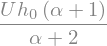

In [25]:
q_sol = sp.solve(p_sol.replace(x,L).replace(p(L),pa),q)[0]
display(q_sol)

and we replace again this result in the pressure distribution

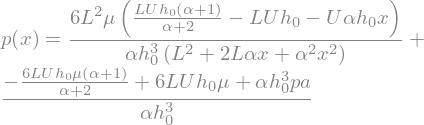

In [26]:
p_sol = p_sol.replace(q,q_sol)
display(p_sol)

Let's rearrange the terms to get it it nicer

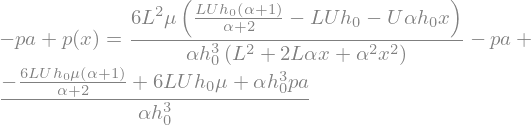

In [27]:
p_sol = sp.Eq(p_sol.lhs-pa,p_sol.rhs-pa)
display(p_sol)

This solution is complex, since it is considering all the values of $\alpha$. We can take advantage of the assumption $\alpha \ll 1$ in order to expand the right hand side in
$\alpha$ up to the first order

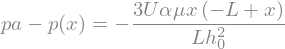

In [28]:
p_sol = sp.Eq(p_sol.lhs,p_sol.rhs.series(alpha,0,n=2).removeO())
p_sol = p_sol.simplify()
display(p_sol)

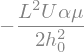

In [29]:
W = -p_sol.rhs.integrate((x,0,L))
display(W)

Remember that it is for unit lenght in the $z$ direction, so the mean (relative) pressure in this fluid film is

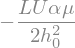

In [30]:
pf = sp.symbols('p_f')
pf = W/L
display(pf)

### Activity (very easy)

Estimate the value of the bearing number $\Lambda$ for this tilting pad


### Exercise

What happens when slope of pad is not increasing, but decreasing?

## 2. Pressure driven microflow. Hele-Shaw flow

[Henry Hele-Shaw](https://en.wikipedia.org/wiki/Henry_Selby_Hele-Shaw) was a British engineer in the late 19th and the early 20th centuries. He published a paper in 1898 about the Stokes flow between to close plates. This kind of flow are now know as [Hele-Shaw flows](https://en.wikipedia.org/wiki/Hele-Shaw_flow). 



The interest of this flow is that, although being highly influence by viscosity, the flow shape in presence of an obstacle (large in comparison with plates distance) is actually a potential flow. This has a hide range of applications in present microdevices design and manufacturing (see, for example, this [MSc thesis from Delft University](https://repository.tudelft.nl/islandora/object/uuid:eacb9fa0-401b-4b17-97b6-f0eed6744bdf)).

This flow is very similar to a [Poiseuille flow](https://en.wikipedia.org/wiki/Hagen%E2%80%93Poiseuille_equation#Plane_Poiseuille_flow), in the sense of quasi-2D flow driven by a pressure gradient.  Let's consider that the flow is parallel to the $x-y$ plane, and normal to the $z$ axis and pressure gradient is given also only in $x$ and $y$ directions. 

![image.png](Hele-Shaw.png)

Velocity equations for $u$ and $v$ are, following equation (5), 

$$-\frac{1}{\rho}\frac{\partial p}{\partial x} + \nu \frac{\partial^2 u}{\partial z^2} = 0 \tag{9a}$$

$$-\frac{1}{\rho}\frac{\partial p}{\partial y} + \nu \frac{\partial^2 v}{\partial z^2} = 0 \tag{9b}$$

$$\frac{\partial p}{\partial z} = 0 \tag{9c}$$

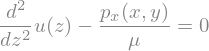

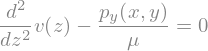

In [31]:
z,h = sp.symbols('z,h') # now h is not a function. It is constant
u = sp.Function('u')
v = sp.Function('v')
p = sp.Function('p')
p_x = sp.Function('p_x')
p_y = sp.Function('p_y')
uEq = sp.Eq(-1/mu*p_x(x,y)+sp.diff(u(z),z,2),0)
vEq = sp.Eq(-1/mu*p_y(x,y)+sp.diff(v(z),z,2),0)
display(uEq)
display(vEq)

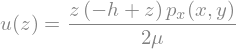

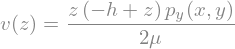

In [32]:
uics = {u(0):0,u(h):0}
vics = {v(0):0,v(h):0}
uSol = sp.dsolve(uEq,u(z),ics=uics).simplify()
vSol = sp.dsolve(vEq,v(z),ics=vics).simplify()
display(uSol)
display(vSol)

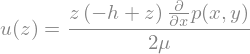

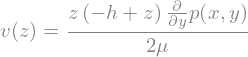

In [33]:
uSol = uSol.replace(p_x(x,y),p(x,y).diff(x))
vSol = vSol.replace(p_y(x,y),p(x,y).diff(y))
display(uSol)
display(vSol)

Remember the definition of [velocity potential](https://en.wikipedia.org/wiki/Velocity_potential). In this case, the solution is very easy 

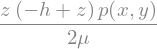

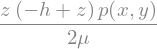

In [34]:
phi_u = sp.Function('phi_u')
phi_v = sp.Function('phi_v')
phi_u = uSol.rhs.integrate(x)
phi_v = vSol.rhs.integrate(y)
display(phi_u)
display(phi_v)

Both solutions are the same and, so, we can just define the velocity potential al

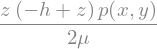

In [35]:
phi = sp.Function('phi')
phi = phi_u
display(phi)

Asuming that there is no vertical velocity, $w = 0$, the continuity equation for 2D flow is just

$$ \nabla_{2D} \cdot \mathbf{u} = \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = \Delta \phi = \Delta p = \frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = 0 \tag{10}$$

### For example...

Let's consider a flow in the $x$ direction with 

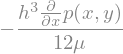

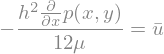

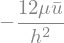

In [36]:
ubar = sp.symbols('ubar')
uInt = uSol.rhs.integrate((z,0,h))
display(uInt)
pEq = sp.Eq(uInt/h,ubar)
display(pEq)
pdiffSol = sp.solve(pEq,p(x,y).diff(x))[0]
display(pdiffSol)

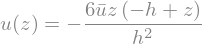

In [37]:
uSol = uSol.subs(p(x,y).diff(x),pdiffSol)
display(uSol)

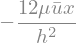

In [38]:
pSol = pdiffSol.integrate(x)
display(pSol)

In this video some experimental flows are presented to show the potential-like Hele-Shaw flows

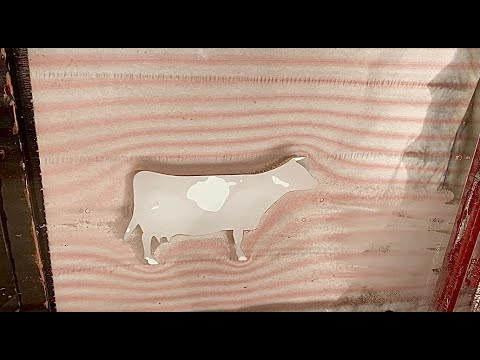

In [39]:
from IPython.display import YouTubeVideo

YouTubeVideo('WUilsJ_HMvQ',width=800,height=600)

Note that this solution does not satisfy the non-slip condition for, for example, $y=0$ (a wall in the $x$ axis). There is a mathematical trick to overcome that: add a velocity $u'$ 

$$ U(y,z) = u(z) + u'(y,z)$$

such that $u' \rightarrow -u$ for $ y \rightarrow 0$ and $u' \rightarrow 0$ for $ y \gg 0$ 

We could make it if we wad more time...

## 3. Surface Tension driven flows

The third kind of microflow that we considering is surface tension driven flows. [Surface tension](https://en.wikipedia.org/wiki/Surface_tension) is the property of liquids responsible of the surface stability. 

The surface tension coefficient (or just surface tension), $\gamma$, has units of force per lenght unit (N/m) and in the particular case of water in air at 20 Celsius degrees its value is $\gamma = 72.8\, \text{mN/m}$. This value is very small compared with inertial forces, or pressure forces, for usual liquid volumes. But it can becomes very important when the liquid volume is of micrometers (or even milimeters) scale.

We have seen in previous courses some basic concepts related to surface tension, as pressure inside bubbles or capillary rise, which are governed by the [Laplace-Young equation](https://en.wikipedia.org/wiki/Young%E2%80%93Laplace_equation) for spherical surfaces. Here we are going to develope a little bit the subject.

From a Fluid Mechanics viewpoint, the presence of an interface implies a pressure jump. This pressure jump is positive or negative in function of the curvature of the surface. 

Let's consider the thermodynamics of a liquid droplet in a surface.

![image.png](drop.png)

(from [_Atomic-scale computational design of hydrophobic RE surface-doped Al2O3 and TiO2_ by Czelej et al](https://www.researchgate.net/publication/318574875_Atomic-scale_computational_design_of_hydrophobic_RE_surface-doped_Al2O3_and_TiO2) 

Its [free energy](https://en.wikipedia.org/wiki/Helmholtz_free_energy) (neglecting temperature variations) is

$$ \newcommand{Vol}{V\kern-0.65em\raise0.3ex-} $$
$$ E = \sum_{i \neq j} A_{ij}\gamma_{ij} - \lambda \Vol \tag{11}$$

where $\Vol$ is the droplet volume (constant) and $\lambda$ is a [Lagrange multiplier](https://en.wikipedia.org/wiki/Lagrange_multiplier) that, physically, is the pressure drop across the interface. $i$ and $j$ can be $l$, $g$ or $s$ depending on the nature os the material (liquid, gas or solid), $A_{ij}$ is the interfacial area between phases $i$ and $j$. It should be noted that if $A_{lg}$ increase on some amount, $A_{sg}$ is decreased in the same amount.

$$ A_{ls} = \pi R^{2} \sin^{2}{\left(\theta \right)} $$
$$ A_{lg} = 2 \pi R^{2} \left(1 - \cos{\left(\theta \right)}\right) $$
$$ \Vol = \pi R^{3} \left(\frac{2}{3} - \frac{3}{4}\cos{\left(\theta \right)} + \frac{\cos{3\theta}}{12}\right) \tag{12}$$ 

So,

$$ E = \underbrace{\pi R^{2} \sin^{2}{\left(\theta \right)} \left( \gamma_{ls}-\gamma_{sg}\right) + \gamma_{lv}2 \pi R^{2} \left(1 - \cos{\left(\theta \right)}\right)}_A - \lambda \underbrace{\pi R^{3} \left(\frac{2}{3} - \frac{3}{4}\cos{\left(\theta \right)} + \frac{\cos{3\theta}}{12}\right)}_B \tag{13}$$

and the minimum condition, $\frac{\partial E}{\partial R} = \frac{\partial E}{\partial \theta} = 0$ leads to

$$ \lambda = \frac{\frac{\partial A}{\partial R}}{\frac{\partial B}{\partial R}}=\frac{\frac{\partial A}{\partial \theta}}{\frac{\partial B}{\partial \theta}} \tag{14}$$

and, after some operations,

$$ \cos{(\theta)} = \frac{\gamma_{sg} - \gamma_{sl}}{\gamma_{lg}} \tag{15}$$

$\lambda$ is the pressure drop across the liquid-gas surface, 

$$\lambda = \Delta p = \frac{\frac{\partial A}{\partial R}}{\frac{\partial B}{\partial R}} = 2 \frac{\gamma_{lg}}{R} \tag{16}$$

For a more general shape (not spherical) is becomes

$$ \Delta p = \gamma_{lg}\left( \frac{1}{R1} + \frac{1}{R2} \right) \tag{17}$$

Gravity effect leads to the definition of a characteristic length scale (capillary length)

$$ l_s = \sqrt{\frac{\gamma}{\rho g}} \tag{18}$$

[Bond (or Eötvös) number](https://en.wikipedia.org/wiki/E%C3%B6tv%C3%B6s_number) is defined as the ratio between characteristic lenght of the system and the capillary length

$$ \text{Bo} = \left( \frac{L}{l_s} \right)^2 \tag{19}$$

Under action of gravity, surface tension is only important if $\text{Bo} \lesssim 1$, that is $L \lesssim 3\,\text{mm}$ for water.

### Example : Shape of fluid interface near a wall

Let's consider the calculation of the shape of the interface of water with a hidrophilic surface, with a known contact angle $\theta < 90^\circ$. The wall is vertical and plane, so there will be curvature in only one direction (say $y$)

![image.png](fluidWallInterface.png)

The [local curvature](https://en.wikipedia.org/wiki/Curvature#Graph_of_a_function) of a line is given by

$$ \frac{1}{r} = \frac{\text{d}^2 z / \text{d} x^2}{\left[1+\left(\text{d} z / \text{d} x\right)^2 \right]^{3/2}} \tag{20}$$

On the otherhand, for a point of the curve, which is at height $z$ there is static relative pressure $-\rho g z$,and the pressure jump in the interface is $\frac{\gamma}{r}$, so the ODE is

$$ \frac{\rho g z}{\gamma} - \frac{z''}{\left(1 + {z'}^2\right)^{3/2}} = 0 \tag{21}$$

since $z=0$ far away from the surface, where it is plane, and $z'' = z' =0$. The boundary conditions are $z'=z''=0$ for $x\rightarrow \infty$ and $z'=-\frac{1}{\tan{\theta}}$ for $x=0$. 

We can make the change of variable $\eta = z/l_s$ and $\xi = x/l_s$ and then the EDO is writen as

$$ \eta- \frac{\eta''}{\left(1+\eta'^2\right)^{3/2}} = 0 \tag{22}$$

with the same boundary conditions.

In [40]:
#This command clears all the variables and history. Just to start over again...
%reset -f  

In [41]:
import numpy as np
import sympy as sp
sp.init_printing()

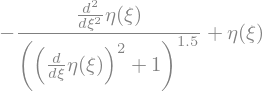

In [42]:
xi,theta = sp.symbols('xi,theta',positive=True)
eta = sp.Function('eta')
exp = eta(xi)-eta(xi).diff(xi,2)/(1+eta(xi).diff(xi)**2)**(3/2)
display(exp)

This expression is not directly integrable

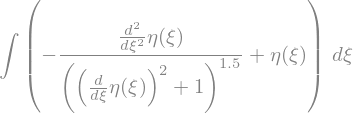

In [43]:
exp.integrate(xi)

But if we use the integration factor $\eta'$, it becomes integrable

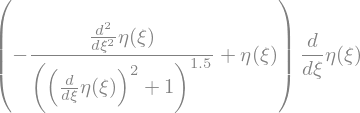

In [44]:
exp = exp*eta(xi).diff(xi)
display(exp)

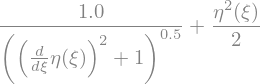

In [45]:
exp2 = exp.integrate(xi)
display(exp2)

Since when $\eta(\xi) = 0$ (i.e. for $\xi\rightarrow \infty$), $\eta'(\xi)=0$, that gives that this expression has to be 1.

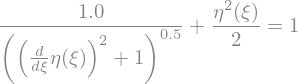

In [46]:
dEq = sp.Eq(exp2,1)
display(dEq)

This equation can be analitically solved (see the book by [Kundu](https://discovery.upc.edu/iii/encore/record/C__Rb1437689?lang=cat), example 4.7) but it is not staightforward. Let us  solve it here numerically with [scipy](https://www.scipy.org/). 

First, we get the value of the heigth of the surface just in the surface, it is, when $\eta'= -\frac{1}{\tan{\theta}}$.

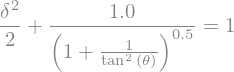

In [47]:
delta = sp.symbols('delta')
deltaEq = dEq.replace(eta(xi).diff(xi),-1/sp.tan(theta)).replace(eta(xi),delta)
display(deltaEq)

There are two solutions. We keep the second one, positive.

In [48]:
delta = sp.solve(deltaEq,delta)[1]
display(delta)

and we try to simplify it a little bit

In [49]:
delta = delta.simplify().trigsimp()
display(delta)

In order to solve dEq we have to isolate the derivative of $\eta$

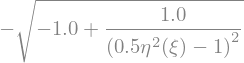

In [50]:
f = sp.solve(dEq,eta(xi).diff(xi))[0]
display(f)

and we generate a function for this derivative

In [51]:
f_np = sp.lambdify((eta(xi),xi),f)

Now we make a function for $\delta(\theta)$, the heigth of the fluid surface in the wall and we solve numerically this equation with $\eta(\xi=0)=\delta$ 

In [52]:
from scipy.integrate import odeint

In [53]:
eta0_f = sp.lambdify(theta,delta)

In [54]:
theta_n = np.deg2rad(30) 
eta0 = sp.N(eta0_f(theta_n),4)
display(eta0)

In [55]:
xi_p = np.linspace(0,10,250)
eta_np = odeint(f_np,eta0,xi_p)

and, finally, we plot it

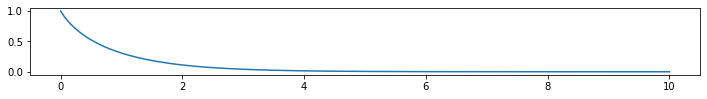

In [56]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,4))
plt.gca().set_aspect('equal', adjustable='box')
ax.plot(xi_p,eta_np,scaley=True)

### Exercise. Shape of meniscus between two plates

Find the shape for two parallels walls separated a distance $L$

Hint: In the middle point between both walls, curvature is not zero, so there is also there a pressure jump. This pressure jump is related, then, to the height of the column, $H$. It suggested to change coordinate axes, as shown in the picture, and change the first equation as

$$ \frac{\rho g (z+H)}{\gamma} - \frac{z''}{\left(1 + {z'}^2\right)^{3/2}} = 0 \tag{23}$$

Also, there are 2 boundary conditions: the derivative of $z(x)$ for $x=-\frac{L}{2}$ and for $x=\frac{L}{2}$

![image.png](MeniscusBetweenPlates.png)


When you have tried to solve the problem, you can check a solution {doc}`here <./MeniscusBetweenPlates>`.

In [58]:
try:
    %load_ext watermark
except:
    !pip install watermark
%watermark -v -m -iv

Python implementation: CPython
Python version       : 3.8.15
IPython version      : 8.7.0

Compiler    : GCC 10.4.0
OS          : Linux
Release     : 5.4.0-139-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

matplotlib: 3.6.2
numpy     : 1.23.5
sympy     : 1.11.1

